In [1]:
import numpy as np
import pandas as pd
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose, STL

import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display
import os

# settings
plt.style.use('seaborn-deep')

/tmp/ipykernel_3054/3144661711.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


In [8]:
df = pd.read_csv(r'../data/01_raw/incidents-26.csv', parse_dates=['date_exploitation'])

df = df[['date_exploitation', 'etat_failed']]


In [9]:
df

,date_exploitation,etat_failed
0,2023-06-26,60
1,2023-06-25,735
2,2023-06-24,36
3,2023-06-23,53
4,2023-06-22,51
...,...,...
547,2021-11-24,67
548,2021-11-23,70
549,2021-11-22,12
550,2021-11-19,5


In [10]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_exploitation  552 non-null    datetime64[ns]
 1   etat_failed        552 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.8 KB
None


,etat_failed
count,552.000000
mean,74.510870
std,82.902299
min,1.000000
25%,35.750000
50%,49.000000
75%,92.250000
max,735.000000


In [5]:
df = pd.concat([df], axis=0)
df = df[['date', 'etat_failed']]

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.set_index('date', inplace=True)

In [8]:
df = df.asfreq('D')

In [9]:
df

,etat_failed
date,
2021-11-18,88.0
2021-11-19,5.0
2021-11-20,NaN
2021-11-21,NaN
2021-11-22,12.0
...,...
2023-06-05,47.0
2023-06-06,40.0
2023-06-07,40.0


In [10]:
df = df[['etat_failed']]
df['etat_failed'] = df['etat_failed'].fillna(0)
df

,etat_failed
date,
2021-11-18,88.0
2021-11-19,5.0
2021-11-20,0.0
2021-11-21,0.0
2021-11-22,12.0
...,...
2023-06-05,47.0
2023-06-06,40.0
2023-06-07,40.0


In [11]:
df['weekday'] = df.index.weekday
df

,etat_failed,weekday
date,,
2021-11-18,88.0,3
2021-11-19,5.0,4
2021-11-20,0.0,5
2021-11-21,0.0,6
2021-11-22,12.0,0
...,...,...
2023-06-05,47.0,0
2023-06-06,40.0,1
2023-06-07,40.0,2


In [12]:
#df_mon = df[df['weekday'] == 0]

In [13]:
df_check = df[['etat_failed']]

<Axes: xlabel='date'>

[06/12/23 10:56:20] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=7189;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=128818;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=177686;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=435033;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=158229;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=217955;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=876023;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=701905;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=549415;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=270760;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=609314;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=91972;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=210217;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=167726;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=975397;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=615401;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=748410;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=685354;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=2736;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=994363;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=715357;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=4963;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=905251;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=593398;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=888742;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=866372;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=545799;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=971799;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=552308;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=818791;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=776078;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=895670;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=419619;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=202104;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=444885;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=909642;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=544552;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=709222;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=860917;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=795855;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=35689;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=737153;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=707308;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=352570;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=366713;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=512661;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=957057;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=68201;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=618009;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=156706;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=890905;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=317585;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=19563;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=875472;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=528468;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=254592;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=604784;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=322974;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=841966;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=814503;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=454341;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=24245;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=665024;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=364505;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=396548;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=326346;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=814988;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=97188;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=229018;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=92341;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=704737;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=720134;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=966982;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=190294;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=523735;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=755454;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=444110;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=637425;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=181079;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=70079;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=737565;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=322435;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=112146;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=103843;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=584192;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=554066;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=765047;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=419198;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=370192;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=479863;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=471950;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=963406;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=888104;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=445736;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=549906;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=21932;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=193238;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=408243;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=423430;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=221257;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=333696;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=619468;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=750178;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=199489;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=399546;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=776187;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=105542;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=961080;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=465128;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=681958;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=478380;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=498120;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=790014;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=578839;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=466512;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=425156;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=459564;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=761479;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=24779;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=385927;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=219508;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662475;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=459513;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=25228;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=971390;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=421257;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=620383;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=644632;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=25803;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=544063;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=546130;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=849572;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=358329;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=225518;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=676030;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=772290;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=711544;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=970588;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=35125;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=375453;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=65435;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=318156;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=242391;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=278484;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=549043;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=668031;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=195176;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=14723;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=131820;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=770787;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=489075;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=557739;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=604699;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=447508;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=891781;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=500804;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=950361;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=605820;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=790388;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=518396;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=49180;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=49871;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=426969;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662607;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=901294;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=703229;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=749789;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=651532;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=895325;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=708581;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=294223;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=135411;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=215450;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=790419;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=259521;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=267392;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=915563;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=25888;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=966174;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=274733;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

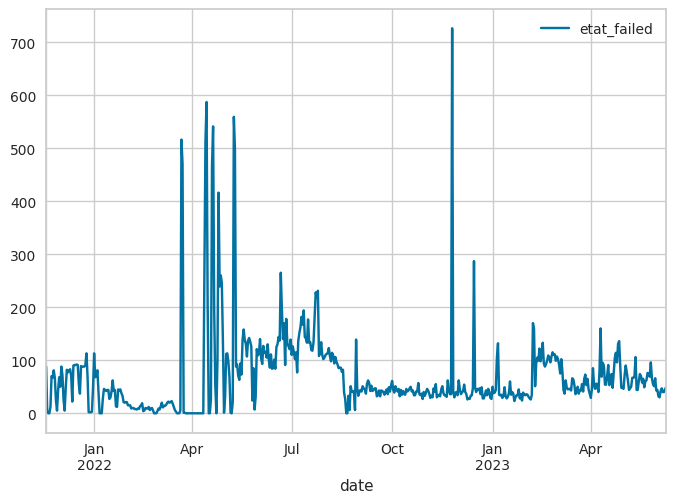

In [14]:
df_check.plot()

## Stationary check

[06/12/23 10:56:29] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=339390;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=163483;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=713240;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=315684;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=282421;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=1739;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=769883;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=620785;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=829956;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=907198;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=575954;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=394154;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=361183;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=114135;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=762816;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=444140;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=651190;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=623183;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=954890;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=440105;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=689227;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=226595;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=415372;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=282308;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=282069;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=365933;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=49499;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=5863;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=954101;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=563576;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=545785;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=851870;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=160291;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=766715;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=211925;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=472377;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=712044;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=441570;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=995971;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=298172;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=328822;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=240193;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=92337;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=118167;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=968133;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=546656;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=674241;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=924378;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=687521;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=746394;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=365961;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=701881;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=625971;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=937597;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=190705;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=677943;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=569404;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=417891;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=633804;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=177791;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=713945;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=341868;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=535619;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=966070;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=251665;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=347934;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=957331;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=940997;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=103410;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=44317;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=161762;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=92746;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=353229;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=756348;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=73874;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=473026;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=963401;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=6367;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=620325;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=173573;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=804260;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=976348;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=202575;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=895097;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=418282;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=568996;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=961969;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=189681;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=262219;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=360647;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=672628;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=98206;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=30463;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=519820;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=66808;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=915541;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=371529;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=946402;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=940007;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=914114;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=676393;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=612176;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=723534;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=96646;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=568823;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=278830;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=702070;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=57207;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=792975;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=654528;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=160015;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=905718;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=531594;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=29380;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=246944;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=343720;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=734880;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=417255;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=497172;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=869938;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=556513;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=105121;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=589543;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=286427;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=794030;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=719357;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=347613;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=297124;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=712854;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=845995;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=135578;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=286784;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=25853;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=776126;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=927958;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=753308;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=597664;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=769161;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=822647;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=178349;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=637940;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=889898;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=508252;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=34079;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=391169;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=518842;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=167843;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=51545;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=440250;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=947815;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=6599;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=409808;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=956999;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=75983;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=352157;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=129092;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=534457;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=730282;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=798635;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=316429;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=881043;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=519240;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=863244;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=326806;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=106898;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=979625;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=396227;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=436979;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=924277;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=904440;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=145670;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=338946;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

[06/12/23 10:56:30] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=348420;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=387338;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=53095;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=345387;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=168380;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=173429;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=858135;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=971901;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=849101;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=297904;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=42290;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=531019;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=497148;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=267738;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=470411;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=626521;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=819869;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=255354;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=417079;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=62775;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=557452;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=367858;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=898856;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=508895;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=404963;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=190446;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=772931;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=252389;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=538618;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=196525;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=159601;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=445098;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=464647;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=918650;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=532980;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=423854;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=917867;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=135243;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=411903;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=761626;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=553478;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=711814;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=838563;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=773579;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=167927;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=385297;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=823924;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=464245;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=239590;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=38982;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=755601;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=623586;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

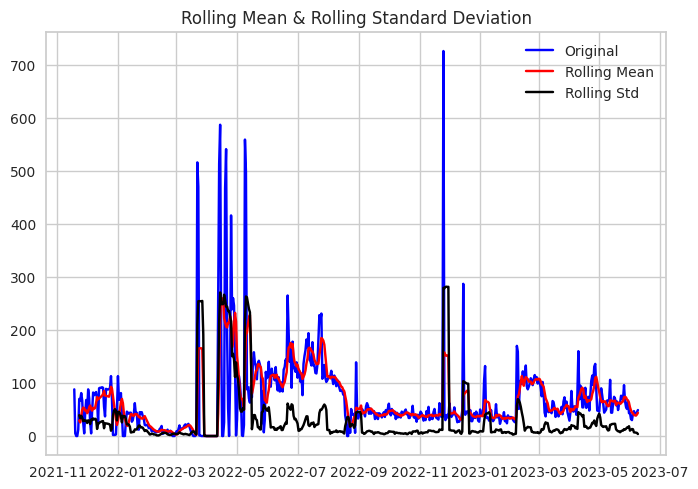

In [15]:
rolling_mean = df_check.rolling(window = 6).mean()
rolling_std = df_check.rolling(window = 6).std()
plt.plot(df_check, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [16]:
### Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

In [17]:
test_result=adfuller(df['etat_failed'])

In [18]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [19]:
adfuller_test(df['etat_failed'])

ADF Test Statistic : -2.9046411993629135
p-value : 0.044810944985736824
#Lags Used : 19
Number of Observations Used : 549
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In [20]:
#df['etat (first difference)'] = df['etat_failed'] - df['etat_failed'].shift(1)

In [21]:
df['etat_failed'].shift(1)

date
2021-11-18     NaN
2021-11-19    88.0
2021-11-20     5.0
2021-11-21     0.0
2021-11-22     0.0
              ... 
2023-06-05    42.0
2023-06-06    47.0
2023-06-07    40.0
2023-06-08    40.0
2023-06-09    45.0
Freq: D, Name: etat_failed, Length: 569, dtype: float64

In [78]:
df['Seasonal First Difference']=df['etat_failed']-df['etat_failed'].shift(7)

In [79]:
df.head(14)

,etat_failed,weekday,Seasonal First Difference,forecast,AE
date,,,,,
2021-11-18,88.0,3,NaN,NaN,NaN
2021-11-19,5.0,4,NaN,NaN,NaN
2021-11-20,0.0,5,NaN,NaN,NaN
2021-11-21,0.0,6,NaN,NaN,NaN
2021-11-22,12.0,0,NaN,NaN,NaN
2021-11-23,70.0,1,NaN,NaN,NaN
2021-11-24,67.0,2,NaN,NaN,NaN
2021-11-25,81.0,3,-7.0,NaN,NaN
2021-11-26,67.0,4,62.0,NaN,NaN


In [80]:
df.tail()

,etat_failed,weekday,Seasonal First Difference,forecast,AE
date,,,,,
2023-06-05,47.0,0,-4.0,68.307138,21.307138
2023-06-06,40.0,1,-26.0,81.400829,41.400829
2023-06-07,40.0,2,-3.0,79.839242,39.839242
2023-06-08,45.0,3,1.0,73.083726,28.083726
2023-06-09,49.0,4,17.0,67.507857,18.507857


In [81]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -8.94880533150835
p-value : 8.838072663138805e-15
#Lags Used : 15
Number of Observations Used : 546
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='date'>

[06/12/23 11:35:32] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=853203;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=854226;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=793391;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=557311;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=892586;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=84244;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=50216;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=768172;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=700701;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=993730;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=858867;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=56119;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=250276;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=470893;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=574683;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=93200;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=154960;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=366561;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=180290;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=36892;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=877979;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=498251;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=26632;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=379419;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=917199;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=304850;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=424522;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=633520;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=932211;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=179326;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=503631;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=568992;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=90133;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=753369;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=516095;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=243890;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=561726;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=750748;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=681031;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=313531;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=219391;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=537837;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=611445;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=442028;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=313870;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=109964;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=809953;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=557188;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=297376;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=375308;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=794791;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=468981;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=362547;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=946003;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=558672;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=188780;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=86904;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=975275;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=725505;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=533372;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=339535;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=959535;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=309679;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=256747;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=527572;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=742;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=985652;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=904093;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=813363;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=726453;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=832403;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=804138;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=139664;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=782966;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=823420;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=845145;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=521972;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=704490;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=1037;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=907745;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=888642;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=172938;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=838644;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=559847;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=449375;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=244669;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=242107;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=278792;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=89416;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=380617;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=632838;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=981086;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=787593;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=148832;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=588842;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=833356;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

[06/12/23 11:35:33] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=833985;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=885638;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=395904;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=214962;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=673509;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=688296;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=664052;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=871209;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=569327;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=901762;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=295545;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=956098;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=827954;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=395661;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=118499;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=458184;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=739881;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=409010;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=554005;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=702560;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=27915;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=326795;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=750311;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=89716;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=770658;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=691439;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=656185;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=492938;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=852005;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=961859;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=695470;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=300748;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

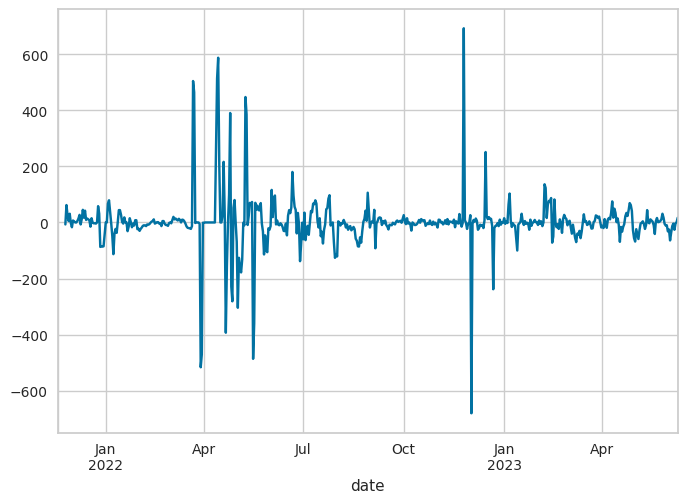

In [82]:
df['Seasonal First Difference'].plot()

In [83]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

[06/12/23 11:35:36] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=89862;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=96304;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=342080;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=814405;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=113604;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=33372;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=903982;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=318735;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=940462;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=706323;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=939427;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=69;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=35398;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=7800;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=953135;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=183904;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=58825;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=250565;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=472104;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=949947;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=563885;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=533762;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=938773;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=618003;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=298075;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=316559;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=361314;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=170689;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=347592;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=602051;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=122377;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=748372;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=455932;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=374740;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=202951;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=156092;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=804710;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=954787;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=384652;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=660059;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=732708;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=501609;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=966863;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=831057;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=960975;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=838082;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=921999;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=800573;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=602608;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=198176;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=637892;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=960565;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=582851;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=434806;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=605998;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=392121;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=867392;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=883886;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=794450;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=6442;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=296429;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=786445;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=704507;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=437389;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=285448;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=941868;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=594179;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=724004;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=59952;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=71903;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=501832;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=540403;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=149556;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=847051;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=5432;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=451460;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=563231;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=172000;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=567226;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=487935;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=366278;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=984852;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=628633;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=137260;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=294049;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=725839;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=538807;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=60443;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=242982;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=238111;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=749606;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=720576;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=657531;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=551741;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=45736;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=116955;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=901507;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=360728;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=417178;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=151959;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=932235;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=486087;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=832133;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=766810;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=186191;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=195594;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=967489;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=394974;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=450089;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=12476;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=633741;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=54856;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=798198;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=628404;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=582435;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=590967;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=713503;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=195640;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=292114;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=352007;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=857395;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=852667;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=249800;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=774999;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=731371;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=485579;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=328272;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=424122;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=580036;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=182701;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=557806;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=763254;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=225659;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=449892;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=599515;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=509755;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=692206;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=376583;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=63556;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=480540;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=810518;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=64024;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=453637;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=605043;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=462072;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=602593;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=690405;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=803270;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=607042;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=550353;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=61399;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=699366;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=520239;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=178506;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=306752;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=185392;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=213377;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=878866;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=948447;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=266501;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=111526;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=112859;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=557649;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=972485;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=893338;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=332976;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=5892;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=43897;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=140543;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=553481;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=18916;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=611666;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=882366;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=732219;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=278527;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=185007;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=400508;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=851381;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=768317;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=547788;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=753674;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=679871;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=511816;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=931741;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=910862;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=528428;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=625063;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=33933;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=723782;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=633208;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=610655;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=765366;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

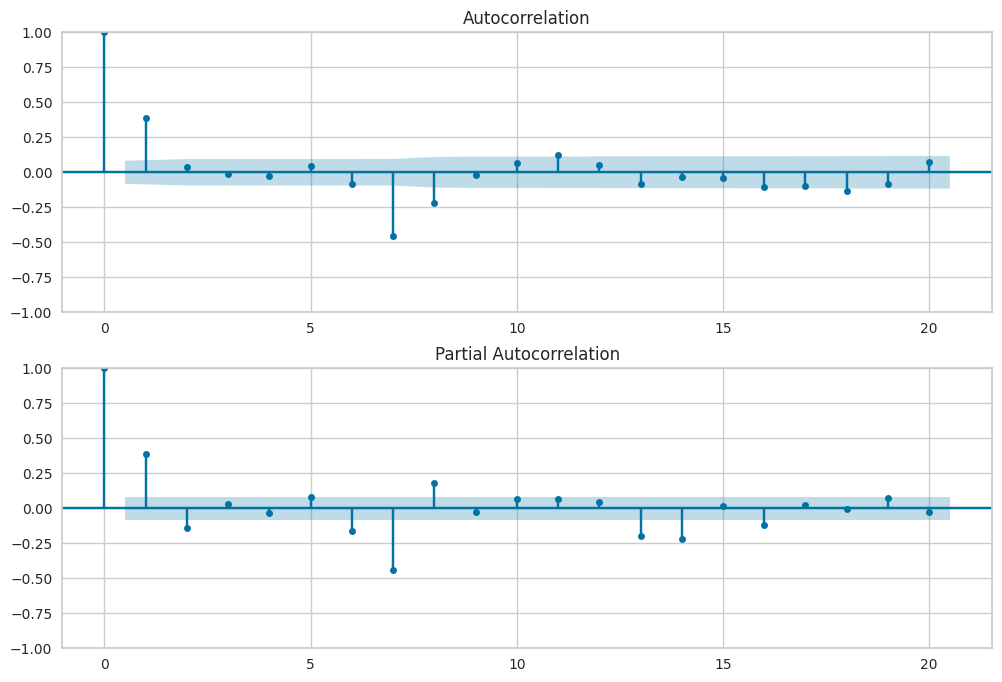

In [84]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[7:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[7:],lags=20,ax=ax2)


[06/12/23 11:35:42] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=528369;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=780194;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=175826;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=801876;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=535269;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=768801;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=253773;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=451952;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=955631;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=79220;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=382487;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=489613;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=704155;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=419782;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=661086;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=605965;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=733361;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=944550;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=148074;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=264809;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=321632;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=641975;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=869441;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=461852;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=846283;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=368023;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=428823;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=303741;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=45180;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=751674;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=754464;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=626465;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=391079;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=606941;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=625150;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=300552;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=188471;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=503120;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=378200;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=737770;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=58644;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=835642;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=365323;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=961074;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=309653;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=192430;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=874033;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=425153;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=289787;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=361381;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=70449;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=696327;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=899731;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=970503;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=270614;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=572345;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=507207;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=440977;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=166354;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=747630;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=260464;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=427355;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=719680;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=414363;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=856571;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=557017;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=133253;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=934229;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=297747;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=949116;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=98567;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=939936;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=51781;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=91664;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=816175;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=722460;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=505124;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=324044;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=11452;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=158727;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=180424;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=37594;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=314461;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=37815;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=765393;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=93170;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=372983;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=724036;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=205725;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=65993;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=580853;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=49520;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=839579;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=780860;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=912972;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=82345;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=7016;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=891411;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=547213;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=619772;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=117147;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=726286;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=779286;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=583963;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=417716;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=750345;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=949288;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=490939;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=169553;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=412028;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=491360;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=935743;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=262720;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=863487;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=603658;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=700074;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=104396;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=271123;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=582231;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=400916;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=670799;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=990934;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=264754;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=582534;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=908866;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=123118;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=890142;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=346066;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=348738;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=789417;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=972521;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=486391;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=705279;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=499959;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=435565;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=587047;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=723069;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=865486;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=963575;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=801541;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=800827;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=125041;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=415048;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=731452;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=259596;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=346843;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=282342;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=15822;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=671935;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=407731;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=545016;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=481008;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=7111;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=837161;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=252238;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=344686;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=891238;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=643218;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=325927;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=899882;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=746934;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=168626;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=573687;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=393504;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=906993;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=85360;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=980598;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=779139;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=962673;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=181134;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=87194;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=302256;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=173746;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=197732;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=767111;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=10625;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=17350;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=227488;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=894785;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=2051;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=228923;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=307239;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=981800;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=104423;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=869979;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=262111;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=374324;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=619029;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=618359;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=518915;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=704163;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=202691;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

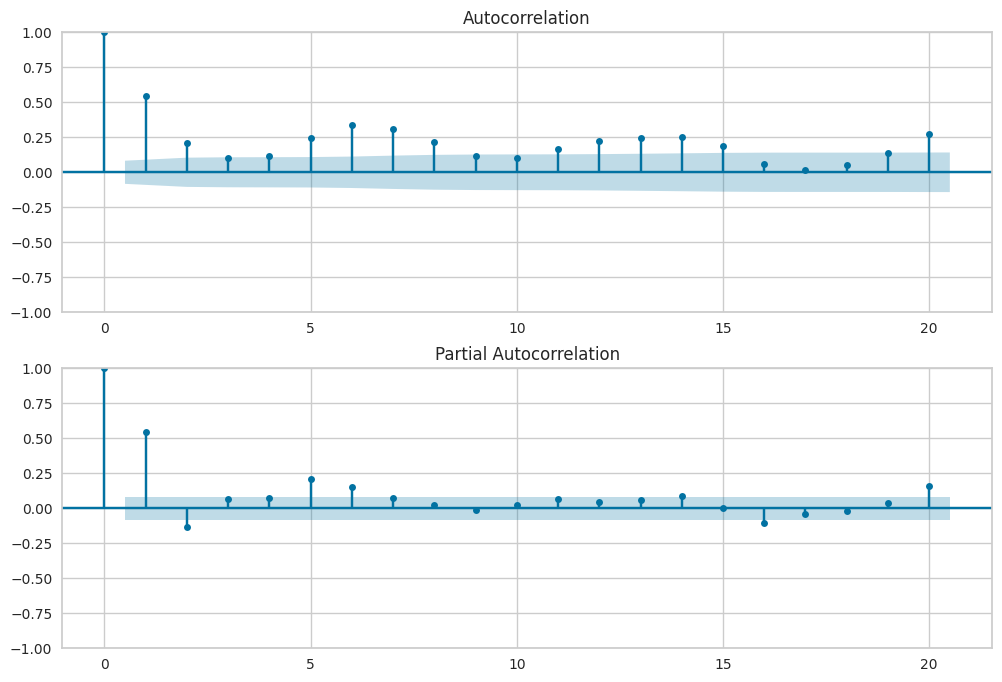

In [85]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['etat_failed'].iloc[7:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['etat_failed'].iloc[7:],lags=20,ax=ax2)

In [86]:
from statsmodels.tsa.arima.model import ARIMA

In [87]:
model=ARIMA(df['etat_failed'],order=(1,1,1))
model_fit=model.fit()

In [88]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            etat_failed   No. Observations:                  569
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3179.332
Date:                Mon, 12 Jun 2023   AIC                           6364.663
Time:                        11:35:48   BIC                           6377.689
Sample:                    11-18-2021   HQIC                          6369.746
                         - 06-09-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4458      0.017     26.956      0.000       0.413       0.478
ma.L1         -0.9532      0.011    -89.802      0.000      -0.974      -0.932
sigma2      4247.4653     55.062     77.140      0.000    4139.547    4355.384
===================================================================================
Ljung-Box (L1) (Q):                   4.82   Jarque-Bera (JB):             42476.78
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                             4.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        44.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='date'>

[06/12/23 11:35:56] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=571343;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=934933;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=269345;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=89248;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=492181;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=374041;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=532323;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=127288;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=336853;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=198215;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=228173;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=74637;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=580547;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=505542;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=68508;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=392573;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=969821;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=518960;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=472359;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=181255;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=276785;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=412295;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=511151;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=762649;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=413607;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=110710;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=704206;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=925119;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=521756;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=893744;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=169504;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=246985;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=213670;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=444036;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=770078;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=778840;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=337514;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=278857;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=303548;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=816371;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=611713;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=75814;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=321098;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=12659;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=110713;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=118372;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=929770;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=2532;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=426836;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=91196;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=284212;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=399363;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=40181;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=4091;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=139533;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=559149;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=608126;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=221852;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=142606;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=546152;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=258304;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=537043;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=291485;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=781166;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=432772;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=70278;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=952974;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=383598;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=604676;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=247801;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=598925;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=38230;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=940890;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=497966;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=171063;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=321066;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=528923;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=874518;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=664777;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=877033;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=200381;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=322750;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=366619;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=956261;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=279395;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=253447;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=813215;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=10572;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=170747;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=418496;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=251962;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=476989;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=702941;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=525340;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=283357;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=270766;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=897063;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=962110;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=267299;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662811;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=267364;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=228808;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=218410;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=7385;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=985899;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=540431;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=55945;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=235118;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=772152;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=141573;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=384820;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=48342;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=429641;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=405280;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=838427;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=504712;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=507791;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=666362;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=113734;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=824715;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=885419;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=635471;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=640737;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=701627;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=527419;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=504823;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=590834;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=722349;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=50072;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=366830;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=334410;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=316290;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=835733;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=733511;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=54750;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=723128;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=232648;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=80415;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=771409;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=568102;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=314726;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=555965;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=717583;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=38318;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=110420;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=561434;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=703284;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=641078;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=995349;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=820968;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=781321;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=62741;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=923406;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=565001;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=433016;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=175455;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=726308;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=442049;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=923162;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=157901;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=929947;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=31353;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=502389;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=582216;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=783366;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=585379;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=436975;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=975744;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=863263;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=716991;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=659003;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=827783;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=775355;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=861691;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=831495;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=708619;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=383288;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=573947;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=630407;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=781284;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=80382;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=914020;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=660019;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=347680;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=421732;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=943894;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=43599;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=246139;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=518791;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=470064;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=148859;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=248407;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=98487;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=695861;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=933097;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=610181;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=98662;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=544400;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=839145;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=174376;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=364164;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=579788;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=323358;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=20270;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=265677;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=436698;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=677296;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=837202;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=954778;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=816858;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=261928;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=627018;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=913854;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=308391;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=597562;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=91740;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=348935;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=886173;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=654666;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=710151;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=761839;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=801731;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=217015;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=970288;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

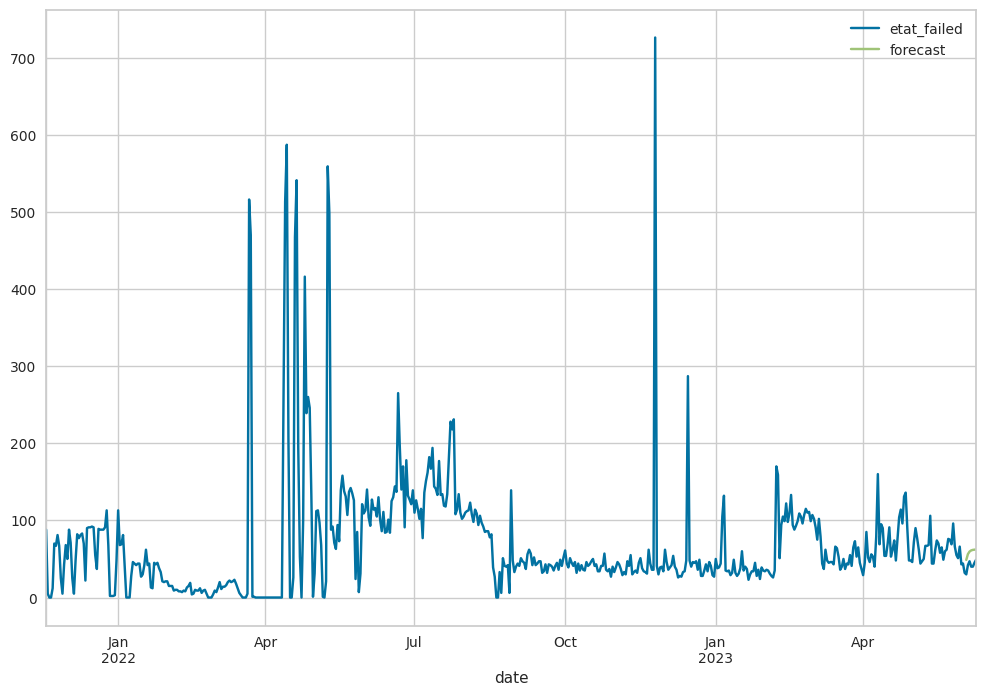

In [89]:
end = len(df)
start= end - 7
df['forecast']=model_fit.predict(start=start,end=end,dynamic=True)
df[['etat_failed','forecast']].plot(figsize=(12,8))

In [90]:
import statsmodels.api as sm

In [91]:
model=sm.tsa.statespace.SARIMAX(df['etat_failed'],order=(1, 1, 1),seasonal_order=(1,1,1,7))
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69109D+00    |proj g|=  7.14037D-02

At iterate    5    f=  5.64637D+00    |proj g|=  8.88198D-03

At iterate   10    f=  5.54631D+00    |proj g|=  2.15934D-02


 This problem is unconstrained.



At iterate   15    f=  5.54069D+00    |proj g|=  1.77463D-02

At iterate   20    f=  5.53433D+00    |proj g|=  7.06025D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     38      1     0     0   3.976D-06   5.534D+00
  F =   5.5343278533718241     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [92]:
len(df)

569

<Axes: xlabel='date'>

[06/12/23 11:36:07] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=114058;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=249262;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=65415;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=47194;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=801924;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=402160;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=906184;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=760107;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=677582;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=898147;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=504953;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=668308;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=898241;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=432110;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=235240;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=457797;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=890775;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=987884;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=880131;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=684881;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=705314;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=728432;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=147519;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=69792;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=855672;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=570868;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=869609;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=705498;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=621845;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=642336;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=626062;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=168154;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=589023;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=29043;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=89695;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=757762;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=106773;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=342588;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=583500;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=711166;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=473030;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=152425;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=777606;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=647480;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=522706;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=984746;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=103961;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=383343;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=826016;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=399006;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=544863;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=235669;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=684436;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=668484;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=88320;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=249034;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=532936;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=272128;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=379019;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=622152;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=833485;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=143769;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=315098;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=719242;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=39801;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=222651;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=271259;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=90639;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=27858;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=627528;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=354336;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=392581;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=631405;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=223904;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=89669;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=614853;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=465546;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=346414;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=9054;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=800017;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=886729;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=441272;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=316180;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=140618;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=268998;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=806486;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=81943;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=656769;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=436683;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=515575;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=443375;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=850451;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=105862;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=850886;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=6097;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=378032;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=786859;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=219878;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=402275;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=992316;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=323028;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=441156;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=609206;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=719437;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=766482;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=231801;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=843895;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=113169;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=496098;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=692303;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=190781;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=186804;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=930438;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=166387;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=322370;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=531241;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=966739;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=188341;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=623427;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=392925;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=204308;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=170343;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=897929;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=330323;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=405025;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=515080;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=606934;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=278811;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=334516;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=685212;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=814010;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=731574;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=913160;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=663407;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=491412;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=307103;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=925833;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=854786;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=663805;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=716193;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=657166;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=52531;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=849284;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=912739;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=62334;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=249916;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=295591;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=381721;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=667614;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=779156;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=272709;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=323274;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=918863;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=632768;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=860496;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=240246;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=823602;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=11448;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=180009;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=686923;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=846913;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=75586;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=81795;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=849416;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=965019;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=991123;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=172320;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=238703;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=470556;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=121776;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=976971;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=825342;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=601394;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=99781;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=115426;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=771804;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=905009;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=499922;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=727341;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=665323;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=385665;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=137605;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=615147;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=628839;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=654353;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=391967;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=404417;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=162201;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=462606;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=497522;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=187906;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=882360;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=323959;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=637573;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=588608;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=572038;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=471841;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=404363;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=262702;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=674104;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=213205;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=430195;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=509826;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=171014;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=925844;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=762149;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=902156;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=906980;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=446692;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=365222;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=512920;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=92066;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=526968;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=363191;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=526020;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=197815;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=225318;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=454911;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=828544;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=565258;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=313301;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=42447;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=709496;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=818982;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

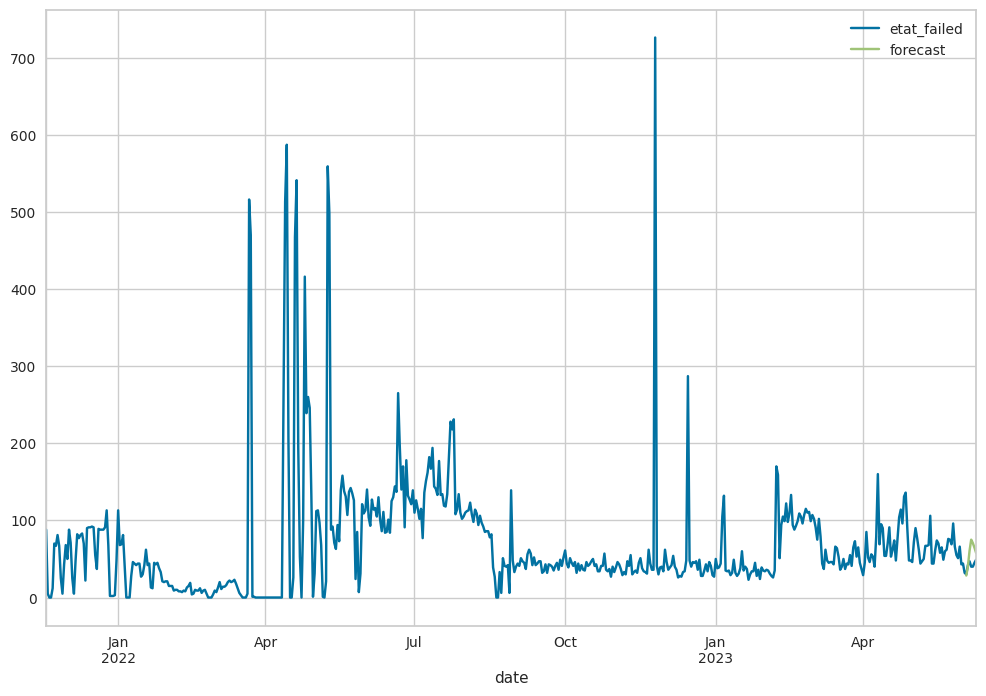

In [93]:
df['forecast']=results.predict(start=start,end=end,dynamic=True)
df[['etat_failed','forecast']].plot(figsize=(12,8))

<Axes: xlabel='date'>

[06/12/23 11:36:13] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=525631;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=297916;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=918890;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=589122;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=671089;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=663788;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=527763;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=25584;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=862209;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=463031;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=195313;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=875989;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=961509;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=533047;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=480120;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=398816;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=567970;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=640549;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=682199;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=543100;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=286507;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=465117;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=508706;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=445760;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=898879;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=172622;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=522531;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=328006;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=175203;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=197501;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=266470;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=133121;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=888290;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=367479;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=450796;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=621152;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=798261;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=801510;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=735749;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=637800;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=317218;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=469177;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=637850;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=48453;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=213765;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=281860;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=701696;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=877466;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=446416;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=135817;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=885351;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=269828;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=333413;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=485360;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=853293;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=953249;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=568559;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=996796;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=687385;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=460779;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=124379;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=129401;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=923139;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=507972;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=480949;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=713524;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=509104;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=208586;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=881604;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=582508;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=413738;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=101552;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=834438;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=340806;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=296310;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=231162;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=631869;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=346619;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=412087;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=138878;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=290479;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=646736;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=478270;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=399247;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=124025;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=351104;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=69;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=625564;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=428142;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=812235;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=200226;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=151603;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=321027;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=708788;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=916849;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=704991;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=355406;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=646903;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=698630;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=569014;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=323720;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=666029;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=600922;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=593150;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=484203;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=242326;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=978048;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=422589;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=441727;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=192587;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=799532;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=875136;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=366190;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=555073;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=316461;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=332499;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=753600;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=194288;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=309370;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=495948;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=355957;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=581852;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=616566;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=135460;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=297758;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=858121;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=987548;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=894445;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=905911;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=977474;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=266010;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=786561;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=358812;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=976270;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=925159;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=333627;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=783769;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=507772;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=397541;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=420024;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=937556;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=340961;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=96628;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=23772;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=705895;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=656660;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=774449;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=314079;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

[06/12/23 11:36:14] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=461563;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=452061;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=729242;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=939258;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=51069;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=61182;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=546989;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=724442;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=497689;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=150530;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=549152;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=777451;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=564464;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=786354;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=496853;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=977457;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=819856;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=399855;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=113184;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=997220;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=558925;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=692739;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=197149;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=195274;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=135648;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=792643;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=651244;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=135208;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=430850;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=577487;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=909367;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=747886;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=663899;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=625632;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=918239;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=23919;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=632320;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=88344;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=892242;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=379509;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=298931;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=735219;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=630206;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=183644;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=693508;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=608166;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=377132;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=362171;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=948520;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=263784;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=729797;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=871557;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=688004;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=195294;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=897747;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=528162;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=827799;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=341996;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=542849;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=484085;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=216282;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=319088;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=868310;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=455238;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=799322;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=217434;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=548133;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=178119;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=817162;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=788320;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=494545;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=11728;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=312802;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=144160;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=191866;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=352330;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=827786;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=324683;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=405032;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=955364;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=661594;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=59950;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=119536;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=379722;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=12143;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=803460;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=717585;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=613135;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=32234;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=749662;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=890450;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=385593;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=850310;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=109878;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=565319;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=775999;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=728380;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=99853;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=170550;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=135430;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=746169;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=44728;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=211327;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=451547;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=738209;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=442139;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=821239;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=706592;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=325634;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=180615;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=968161;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=763555;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=451011;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=654797;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=141970;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=891456;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=230202;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=768597;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=73672;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=187001;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=745235;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=574623;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=168048;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=622563;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=883139;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=981732;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=883014;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=444329;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=876730;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=238727;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=448172;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=740629;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=947493;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=17974;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=975425;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=541033;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=193266;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=620389;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=905774;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=923809;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

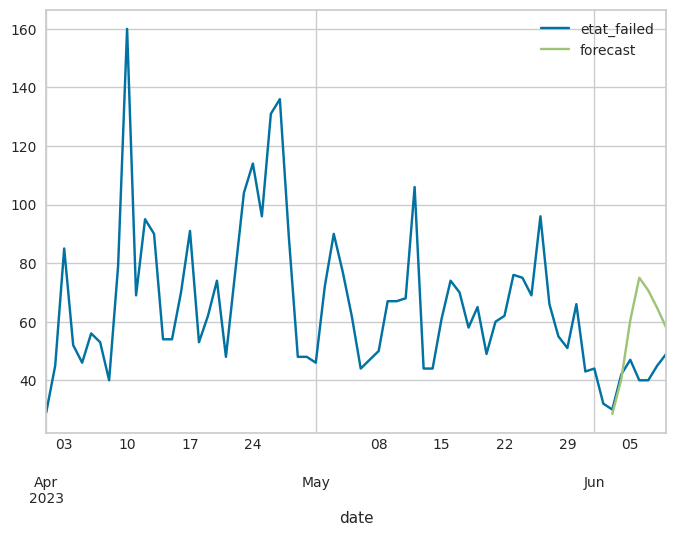

In [94]:
df[['etat_failed', 'forecast']].tail(70).plot()

In [95]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(0,8)]

In [96]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [97]:
future_datest_df

,etat_failed,weekday,Seasonal First Difference,forecast,AE
2023-06-10,NaN,NaN,NaN,NaN,NaN
2023-06-11,NaN,NaN,NaN,NaN,NaN
2023-06-12,NaN,NaN,NaN,NaN,NaN
2023-06-13,NaN,NaN,NaN,NaN,NaN
2023-06-14,NaN,NaN,NaN,NaN,NaN
2023-06-15,NaN,NaN,NaN,NaN,NaN
2023-06-16,NaN,NaN,NaN,NaN,NaN


In [98]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

[06/12/23 11:36:26] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=67809;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=900338;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=143845;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=412278;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=61417;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=874094;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=389722;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=254066;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=267173;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=143021;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=71259;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=136942;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=840360;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=432378;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=161788;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=710046;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=103421;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=52065;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=203109;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=42696;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=13355;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=843309;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=540435;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=98598;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=9771;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=507666;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=687212;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=126387;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=814532;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=640231;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=636152;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=58071;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=903357;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=231561;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=891433;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=223476;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=346992;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=7950;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=235855;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=786110;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=147532;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=828240;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=427331;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=102245;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=803837;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=685545;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=747227;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=909233;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=604831;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=1086;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=583333;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=764066;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=98717;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=927601;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=722846;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=348340;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=51606;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=466452;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=329114;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=41143;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=590327;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=411926;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=369060;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=735456;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=95169;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=34944;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=238548;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=461653;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=894637;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=816403;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=459808;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=498757;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=736767;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=341110;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=47996;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=508208;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=972615;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=608458;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=492160;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=191197;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=502656;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=705044;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=95675;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=175298;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=833203;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=192549;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=215783;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=505516;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=678552;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=857695;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=265811;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=743614;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=316368;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=423779;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=457650;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=503286;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=557689;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=83166;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=219446;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=257371;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=371165;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=816627;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=697347;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=720208;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=648464;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=28609;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=245707;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=666659;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=38076;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=641427;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=269934;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=846091;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=512602;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=519028;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=874334;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=696018;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=625070;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=155671;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=974310;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=758694;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=529638;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=190141;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=263273;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=66045;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=413584;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=531965;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=258553;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=676421;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=83874;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=32602;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=982656;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=990062;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=388325;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=782627;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=726218;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=24123;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=517786;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=183439;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=238750;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=830932;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=189329;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=333393;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=600165;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=492617;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=907209;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=635642;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=32553;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=121120;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=384128;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=162501;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=666168;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=242297;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=733066;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=934800;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=689585;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=13804;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=375952;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=383249;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=381509;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=594571;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=81136;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=474809;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=849755;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=682670;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=949291;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=213736;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=844322;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=670471;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=958869;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=692918;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=216277;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=527063;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=714361;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=606951;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=570590;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=307804;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=274302;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=962375;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=760596;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=428680;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=718556;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=402372;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=938843;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=388255;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=258559;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=16938;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=572531;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=804872;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=419792;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=699290;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=763803;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=275334;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=162913;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=49524;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=605921;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=439088;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=492761;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=145418;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=586032;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=331478;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=37235;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=862955;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=830200;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=280923;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=135660;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=867590;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=453305;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=790411;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=154925;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=589174;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=625083;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=673047;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

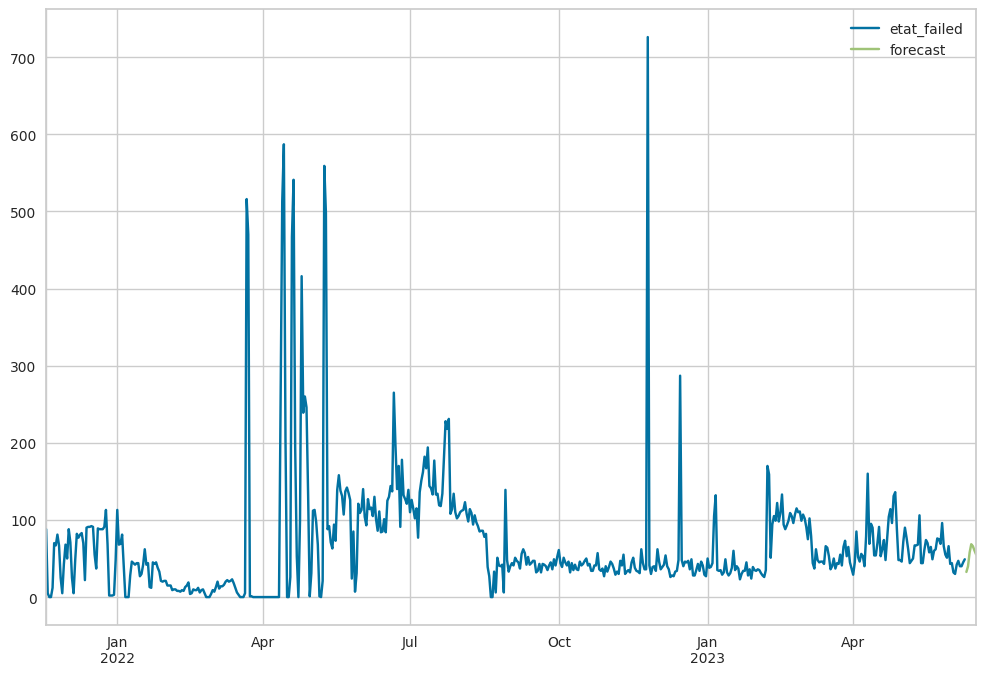

In [99]:
future_df['forecast'] = results.predict(start = (end), end=(end+7), dynamic= True)  
future_df[['etat_failed', 'forecast']].plot(figsize=(12, 8)) 

<Axes: >

[06/12/23 11:36:31] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=137994;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=653976;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=747807;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=393031;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=605070;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=464306;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=940409;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=748420;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=930208;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=275099;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=791939;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=300198;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=272232;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=193160;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=38529;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=381215;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=64203;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=75766;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=804781;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=990951;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=933173;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=264069;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=874032;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=235165;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=948371;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=710808;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=317641;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=259115;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=993960;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=83051;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=648633;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=417548;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=688356;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=261023;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=953962;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=524855;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=310991;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=716458;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=441498;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=544792;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=910710;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=735347;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=490306;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=228133;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=668969;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=463696;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=533304;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=972559;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=74245;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=109914;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=368841;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=962151;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=472637;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=434901;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=945259;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=612870;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=700585;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=775452;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=999565;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=191476;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=70590;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=697401;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=521089;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=481820;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=32712;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=998492;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=735318;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=241430;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=801462;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=878800;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=565307;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=101900;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=589808;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=853602;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=492144;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=976250;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=313639;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=78697;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=617070;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=749835;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=323519;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=293503;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=406586;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=123244;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=683125;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=407626;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=409452;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=457814;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=846147;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=182183;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=579446;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=577779;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=269222;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=875280;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=844369;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=90293;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=95192;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=644802;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=619998;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=523329;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=987763;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=534541;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=873348;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=241493;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=478990;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=854877;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=258490;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662828;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=972770;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=668623;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=920804;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=698479;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=242648;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=803156;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=331615;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=895188;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=485883;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=396344;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=798070;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=486693;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=354168;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=534328;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=824482;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=297313;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=452453;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=427653;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=904264;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=445787;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=626492;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=719900;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=116090;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=885447;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=774817;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=79855;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=794430;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=167404;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=515426;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=395494;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=873970;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=974509;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=778063;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=334033;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=160219;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=230559;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=149982;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=742808;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=107190;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=38948;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=162156;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=885948;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=631379;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=953660;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=805287;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=443692;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=574119;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=385603;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=729572;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=825954;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=997802;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=630511;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=391192;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=293228;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=176280;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=460641;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=353117;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=905644;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=895134;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=905998;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=669996;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=156991;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=451643;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=598553;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=601331;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=906315;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=535704;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=450376;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=824185;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=383276;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=903511;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=624386;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=454306;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=556272;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=241698;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=102506;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=710250;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=108257;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=333624;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=97072;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=766759;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=867051;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=62707;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=984684;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=550906;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=204679;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=132098;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=18638;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=104975;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=667079;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=318662;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=280083;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=932026;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=775309;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=254297;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=943441;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=589236;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=84127;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=118984;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=779810;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=193909;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=285883;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=729413;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=867897;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=368980;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=991517;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=886278;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=463498;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=129069;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=884812;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=862335;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=159976;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=739243;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=804038;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=213706;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=658868;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=233927;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=864953;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=158495;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=169501;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=413300;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=68194;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=971365;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=456418;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=273009;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=464419;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=330270;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=475944;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=89857;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=825571;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=75027;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=590945;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=825107;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=989459;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=12813;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=27043;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=490378;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=426348;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=519098;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=396522;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=248597;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=987865;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=162508;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=78165;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

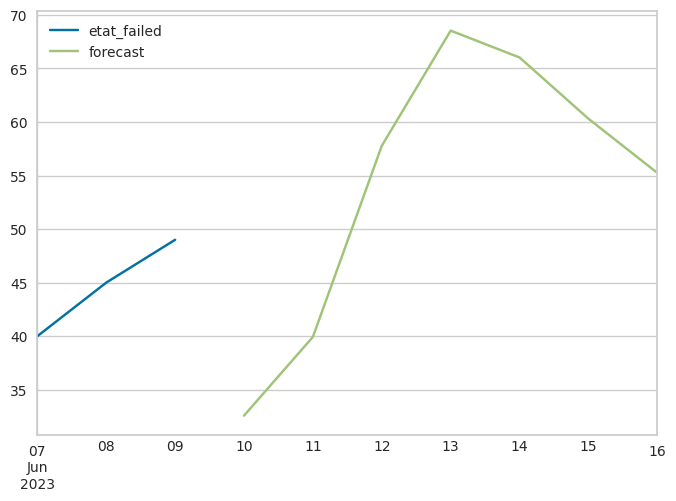

In [100]:
future_df[['etat_failed', 'forecast']].tail(10).plot()

In [101]:
df.tail(10)

,etat_failed,weekday,Seasonal First Difference,forecast,AE
date,,,,,
2023-05-31,43.0,2,-32.0,NaN,29.831685
2023-06-01,44.0,3,-25.0,NaN,25.762223
2023-06-02,32.0,4,-64.0,NaN,36.760263
2023-06-03,30.0,5,-36.0,28.524515,17.445116
2023-06-04,42.0,6,-13.0,40.390101,9.576551
2023-06-05,47.0,0,-4.0,60.473682,21.307138
2023-06-06,40.0,1,-26.0,75.020897,41.400829
2023-06-07,40.0,2,-3.0,70.679143,39.839242
2023-06-08,45.0,3,1.0,64.661236,28.083726


In [102]:
df['AE'] = abs(df['etat_failed'] - df['forecast'])

In [104]:
df['AE'].tail(7).mean()

15.838374857710093

In [76]:
df['etat_failed'].mode()

0    0.0
Name: etat_failed, dtype: float64

In [77]:
future_df.tail()

,etat_failed,weekday,Seasonal First Difference,forecast
2023-06-12,NaN,NaN,NaN,57.773565
2023-06-13,NaN,NaN,NaN,68.526724
2023-06-14,NaN,NaN,NaN,66.018629
2023-06-15,NaN,NaN,NaN,60.302076
2023-06-16,NaN,NaN,NaN,55.243042
